In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization


In [2]:
train_dir = "C:/Users/Tharun/Downloads/Major/DATASET/TRAIN"
test_dir = "C:/Users/Tharun/Downloads/Major/DATASET/TEST"


In [3]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split=0.5)

In [4]:
Batch_size = 32

train_set = train_datagen.flow_from_directory(train_dir, class_mode='binary',
                                              batch_size = Batch_size,
                                              target_size=(64, 64))


val_set = val_datagen.flow_from_directory(test_dir, class_mode='binary',
                                          batch_size = Batch_size,
                                          target_size=(64, 64),
                                          subset= 'training')
   

test_set = val_datagen.flow_from_directory(test_dir, class_mode = 'binary',
                                           batch_size = Batch_size, 
                                           target_size=(64, 64),
                                           subset= 'validation')

Found 22564 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 1256 images belonging to 2 classes.


In [5]:
train_set.class_indices

{'O': 0, 'R': 1}

In [6]:
train_set.image_shape

(64, 64, 3)

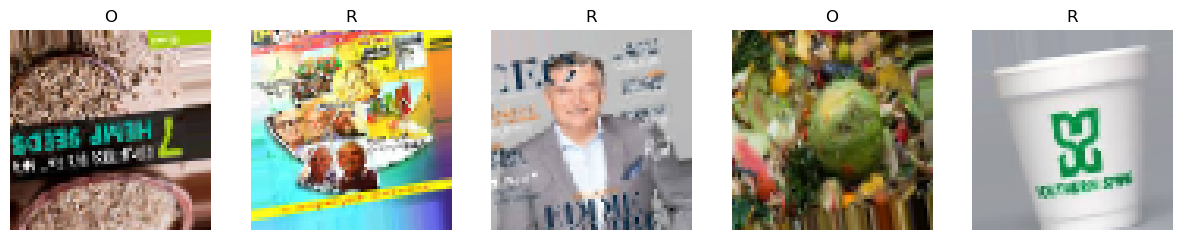

In [7]:
def print_sample_images(generator, num_images=5):
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.show()

print_sample_images(train_set)


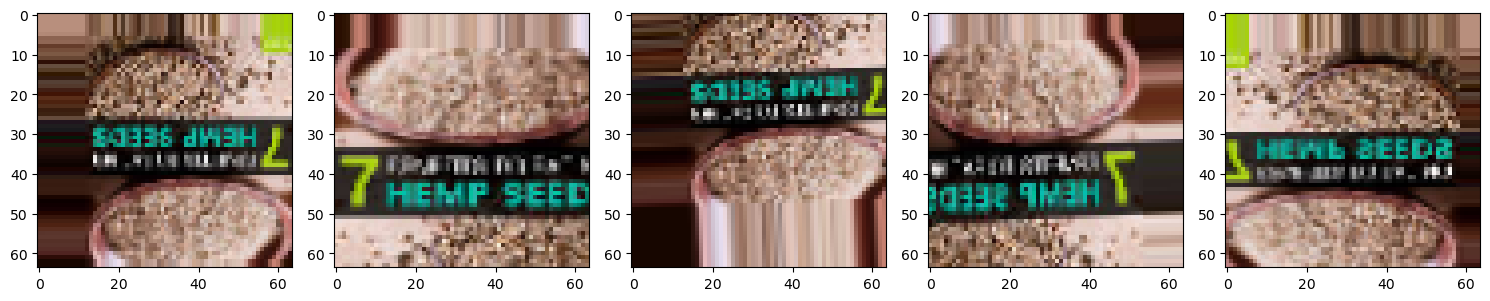

In [8]:
def Images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_img = [train_set[0][0][0] for i in range(5)]
Images(augmented_img)

In [9]:
model = Sequential([                
  Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  MaxPool2D((2,2)),
  Conv2D(32, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Conv2D(64, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(units=128, activation="relu"),
  Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [10]:
history = model.fit(
    train_set,
    epochs = 5,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/5
22/22 [==============================] - 40s 2s/step - loss: 0.6130 - accuracy: 0.6690 - val_loss: 0.4333 - val_accuracy: 0.8441
Epoch 2/5
22/22 [==============================] - 21s 968ms/step - loss: 0.4876 - accuracy: 0.7642 - val_loss: 0.4339 - val_accuracy: 0.8186
Epoch 3/5
22/22 [==============================] - 20s 907ms/step - loss: 0.4813 - accuracy: 0.7884 - val_loss: 0.4323 - val_accuracy: 0.8091
Epoch 4/5
22/22 [==============================] - 20s 906ms/step - loss: 0.4614 - accuracy: 0.7969 - val_loss: 0.4515 - val_accuracy: 0.8313
Epoch 5/5
22/22 [==============================] - 19s 873ms/step - loss: 0.4297 - accuracy: 0.8168 - val_loss: 0.4961 - val_accuracy: 0.8115


In [11]:
import seaborn as sns
sns.set(style="whitegrid")


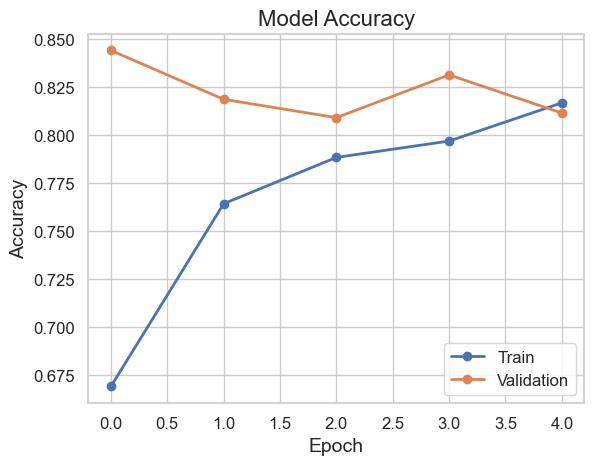

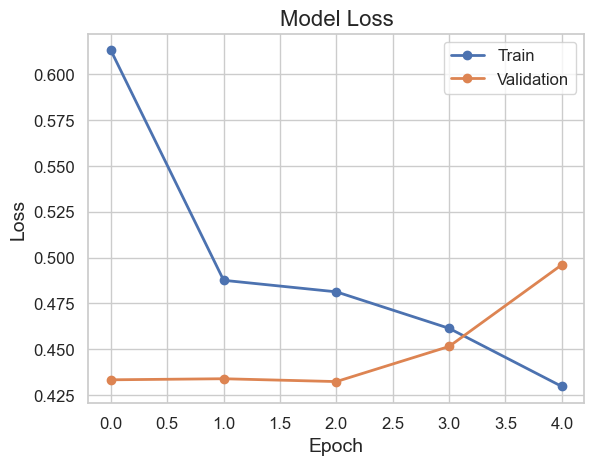

In [12]:
# Plot training and validation accuracy
sns.set(style="whitegrid")
plt.plot(history.history['accuracy'], label='Train', linewidth=2, marker='o', markersize=6)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2, marker='o', markersize=6)
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train', linewidth=2, marker='o', markersize=6)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2, marker='o', markersize=6)
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8416


In [14]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
base_model.trainable = False
model1 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

In [15]:
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [16]:
history1 = model1.fit(
    train_set,
    epochs=5,
    validation_data=val_set,
    verbose=1
)


Epoch 1/5
706/706 [==============================] - 465s 646ms/step - loss: 0.3788 - accuracy: 0.8418 - val_loss: 0.4809 - val_accuracy: 0.8266
Epoch 2/5
706/706 [==============================] - 219s 310ms/step - loss: 0.3370 - accuracy: 0.8597 - val_loss: 0.4526 - val_accuracy: 0.8369
Epoch 3/5
706/706 [==============================] - 219s 311ms/step - loss: 0.3237 - accuracy: 0.8658 - val_loss: 0.4019 - val_accuracy: 0.8584
Epoch 4/5
706/706 [==============================] - 218s 309ms/step - loss: 0.3112 - accuracy: 0.8698 - val_loss: 0.4186 - val_accuracy: 0.8520
Epoch 5/5
706/706 [==============================] - 221s 313ms/step - loss: 0.3046 - accuracy: 0.8697 - val_loss: 0.4289 - val_accuracy: 0.8449


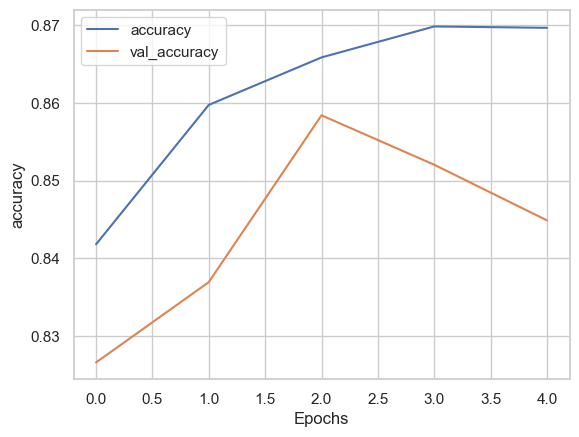

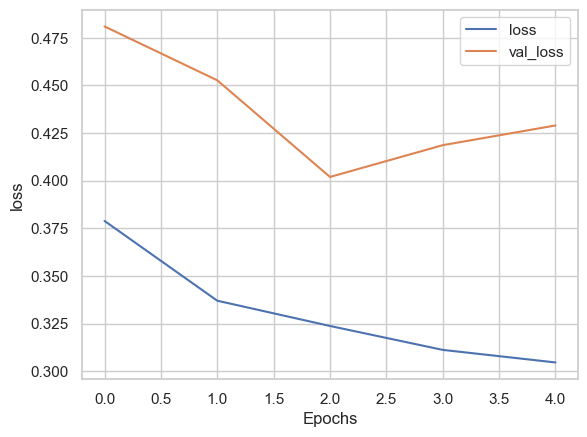

In [17]:
def plot_graphs(history, string):
    sns.set(style="whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot accuracy and loss for model1
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [18]:
loss, accuracy = model1.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8161


In [19]:
model2 = Sequential([
   Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(32, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(64, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(128, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Flatten(),
   Dense(64, activation="relu"),
   Dense(32, activation="relu"),
   Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)         

In [20]:
history_2 = model2.fit(
    train_set,
    epochs = 10,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/10
22/22 [==============================] - 17s 631ms/step - loss: 0.6610 - accuracy: 0.6108 - val_loss: 0.4761 - val_accuracy: 0.8218
Epoch 2/10
22/22 [==============================] - 13s 585ms/step - loss: 0.5426 - accuracy: 0.7585 - val_loss: 0.4892 - val_accuracy: 0.7884
Epoch 3/10
22/22 [==============================] - 13s 580ms/step - loss: 0.5132 - accuracy: 0.7685 - val_loss: 0.4732 - val_accuracy: 0.8035
Epoch 4/10
22/22 [==============================] - 13s 585ms/step - loss: 0.4749 - accuracy: 0.7827 - val_loss: 0.4547 - val_accuracy: 0.8083
Epoch 5/10
22/22 [==============================] - 13s 597ms/step - loss: 0.4816 - accuracy: 0.7926 - val_loss: 0.4356 - val_accuracy: 0.8178
Epoch 6/10
22/22 [==============================] - 13s 581ms/step - loss: 0.4717 - accuracy: 0.7841 - val_loss: 0.4381 - val_accuracy: 0.8162
Epoch 7/10
22/22 [==============================] - 13s 580ms/step - loss: 0.4517 - accuracy: 0.7841 - val_loss: 0.4454 - val_accuracy: 0.8107

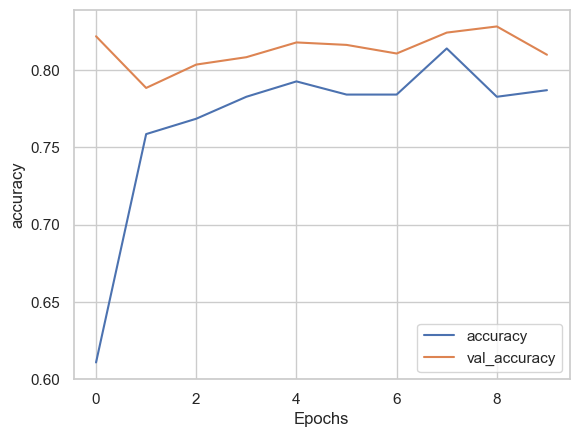

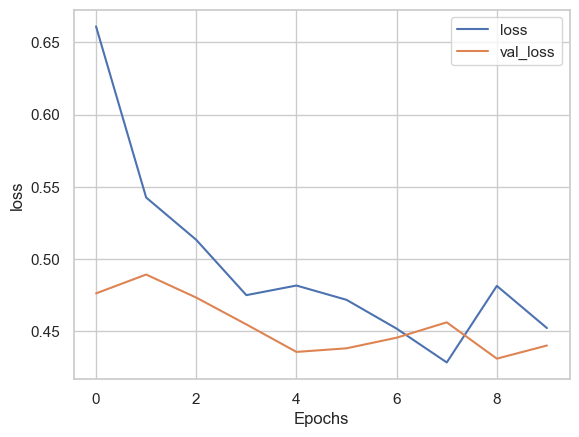

In [21]:
def plot_graphs(history, string):
    sns.set(style="whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [22]:
loss, accuracy = model2.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8997


In [24]:
model2.save("waste_AG_model.h5")

In [39]:
# add the image path pg
test_image = image.load_img(r"C:\Users\Tharun\Downloads\Major\DATASET\TEST\O\O_13964.jpg", target_size = (64, 64))

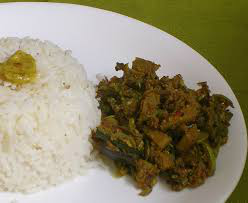

In [40]:
Image.open(r"C:\Users\Tharun\Downloads\Major\DATASET\TEST\O\O_13964.jpg")

In [41]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# prediction
result = model2.predict(test_image)

1/1 [==============================] - 0s 141ms/step


In [42]:
# dataset class index
train_set.class_indices

{'O': 0, 'R': 1}

In [43]:
print(result)



[[0.]]


In [44]:
if result[0][0] == 1:
    prediction = ' Inorganic  Waste'
else:
    prediction = 'Organic Waste'

In [45]:
print(prediction)

Organic Waste
